In [2]:
# Import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from ripser import ripser
from ripser import Rips
import persim
from persim import plot_diagrams
from persim import PersImage
from persim import PersistenceImager
import scipy.io.wavfile

from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.plotting import plot_point_cloud

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D


# read file / store dictionary
import os
import pickle

In [2]:
# This function finds the optimal optimal parameters dT and tao.

def SW_embedding(X):
    dimension = 17 #max limit dimension
    time_delay = 17 #max limit time delay

    embedder = SingleTakensEmbedding(parameters_type='search',dimension=dimension,time_delay=time_delay)
    return embedder.fit_transform(X)
    # print('Optimal embedding time delay based on mutual information:', embedder.time_delay_)
    # print('Optimal embedding dimension based on false nearest neighbors:',embedder.dimension_)
    # print('Shape of embedded point cloud:', embedded_signal.shape)

In [3]:
#PCA: to reduce dimension
def PCA_3d(embedded_signal):
    pca = PCA(n_components=3)
    embedded_signal = pca.fit_transform(embedded_signal)

    # plot_point_cloud(embedded_signal)

In [4]:
# To subsample the point cloud

def subsample(embedded_signal):
    subsample_factor = 10
    return np.array([embedded_signal[subsample_factor*t,:] for t in range(int(len(embedded_signal)/subsample_factor))])

In [5]:
# Examine persistent homology of the point cloud

def VRcomplex(subsampled_embedded_signal):
    rips = Rips(maxdim=1, coeff=2); 
    return rips.fit_transform(subsampled_embedded_signal)[1]

In [17]:
#Read through "TDA voice dataset" 
#Read in the audio file.  Fs is the sample rate, and X is the audio signal

directory = 'TDA voice dataset (Siri)'
audio_files = [voice for voice in os.listdir(directory) if voice.endswith('.wav')]

for i,file_name in enumerate(audio_files):
    ##Read the audio file
    Fs, X = scipy.io.wavfile.read(os.path.join(directory, file_name))
    print(file_name+" read successfully")
    ##compute PD
    #sliding window embeddings with the optimal parameters 
    embedded_X= SW_embedding(X)
    print(file_name+" embedded successfully")
    #Use PCA to get the point cloud in 3 dimension
    PCA_3d(embedded_X)
    #subsample the point cloud
    sub_embedded_X= subsample(embedded_X)
    print(file_name + "PH computation starting")
    #To compute persistent homology. Find betti number 0,1,and 2
# VRcomplex(sub_embedded_X)
    ## Store the audio file
    audioFile_dict[file_name]= VRcomplex(sub_embedded_X) #PH_matrix
    print(file_name+" PH matrix inserted")
    



Siri TY 3.wav read successfully
Siri TY 3.wav embedded successfully
Siri TY 3.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Siri TY 3.wav PH matrix inserted
Siri Hello 4.wav read successfully
Siri Hello 4.wav embedded successfully
Siri Hello 4.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Siri Hello 4.wav PH matrix inserted
Siri Hello 5.wav read successfully
Siri Hello 5.wav embedded successfully
Siri Hello 5.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Siri Hello 5.wav PH matrix inserted
Siri TY 2.wav read successfully
Siri TY 2.wav embedded successfully
Siri TY 2.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Siri TY 2.wav PH matrix inserted
Siri TY 1.wav read successfully
Siri TY 1.wav embedded successfully
Siri TY 1.wavPH comp

In [26]:
#Read through "TDA voice dataset" 
#Read in the audio file.  Fs is the sample rate, and X is the audio signal

directory = 'TDA voice dataset (Daniel)'
audio_files = [voice for voice in os.listdir(directory) if voice.endswith('.wav')]

for i,file_name in enumerate(audio_files):
    ##Read the audio file
    Fs, X = scipy.io.wavfile.read(os.path.join(directory, file_name))
    print(file_name+" read successfully")
    ##compute PD
    #sliding window embeddings with the optimal parameters 
    embedded_X= SW_embedding(X)
    print(file_name+" embedded successfully")
    #Use PCA to get the point cloud in 3 dimension
    PCA_3d(embedded_X)
    #subsample the point cloud
    sub_embedded_X= subsample(embedded_X)
    print(file_name + "PH computation starting")
    #To compute persistent homology. Find betti number 0,1,and 2
# VRcomplex(sub_embedded_X)
    ## Store the audio file
    audioFile_dict[file_name]= VRcomplex(sub_embedded_X) #PH_matrix
    print(file_name+" PH matrix inserted")
    print( str(i+1)+" of 15 inserted")    

Daniel HAY 4.wav read successfully
Daniel HAY 4.wav embedded successfully
Daniel HAY 4.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Daniel HAY 4.wav PH matrix inserted
1 of 15 inserted
Daniel HAY 5.wav read successfully
Daniel HAY 5.wav embedded successfully
Daniel HAY 5.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Daniel HAY 5.wav PH matrix inserted
2 of 15 inserted
Daniel HAY 1.wav read successfully
Daniel HAY 1.wav embedded successfully
Daniel HAY 1.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Daniel HAY 1.wav PH matrix inserted
3 of 15 inserted
Daniel HAY 2.wav read successfully
Daniel HAY 2.wav embedded successfully
Daniel HAY 2.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Daniel HAY 2.wav PH matrix inserted
4 of 15 inser

ValueError: y should be a 1d array, got an array of shape (65856, 2) instead.

In [33]:
#Read through "TDA voice dataset" 
#Read in the audio file.  Fs is the sample rate, and X is the audio signal

directory = 'TDA voice dataset (Kathy)'
audio_files = [voice for voice in os.listdir(directory) if voice.endswith('.wav')]

for i,file_name in enumerate(audio_files):
    ##Read the audio file
    Fs, X = scipy.io.wavfile.read(os.path.join(directory, file_name))
    print(file_name+" read successfully")
    ##compute PD
    #sliding window embeddings with the optimal parameters 
    embedded_X= SW_embedding(X)
    print(file_name+" embedded successfully")
    #Use PCA to get the point cloud in 3 dimension
    PCA_3d(embedded_X)
    #subsample the point cloud
    sub_embedded_X= subsample(embedded_X)
    print(file_name + "PH computation starting")
    #To compute persistent homology. Find betti number 0,1,and 2
# VRcomplex(sub_embedded_X)
    ## Store the audio file
    audioFile_dict[file_name]= VRcomplex(sub_embedded_X) #PH_matrix
    print(file_name+" PH matrix inserted")
    print( str(i+1)+" of 15 inserted")    

Kathy HAY 2.wav read successfully
Kathy HAY 2.wav embedded successfully
Kathy HAY 2.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Kathy HAY 2.wav PH matrix inserted
1 of 15 inserted
Kathy HAY 3.wav read successfully
Kathy HAY 3.wav embedded successfully
Kathy HAY 3.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Kathy HAY 3.wav PH matrix inserted
2 of 15 inserted
Kathy HAY 1.wav read successfully
Kathy HAY 1.wav embedded successfully
Kathy HAY 1.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Kathy HAY 1.wav PH matrix inserted
3 of 15 inserted
Kathy HAY 4.wav read successfully
Kathy HAY 4.wav embedded successfully
Kathy HAY 4.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Kathy HAY 4.wav PH matrix inserted
4 of 15 inserted
Kathy HAY 5.

In [66]:
#Read through "TDA voice dataset" 
#Read in the audio file.  Fs is the sample rate, and X is the audio signal

directory = 'TDA voice dataset (Angel)'
audio_files = [voice for voice in os.listdir(directory) if voice.endswith('.wav')]

for i,file_name in enumerate(audio_files):
    ##Read the audio file
    Fs, X = scipy.io.wavfile.read(os.path.join(directory, file_name))
    print(file_name+" read successfully")
    ##compute PD
    #sliding window embeddings with the optimal parameters 
    embedded_X= SW_embedding(X)
    print(file_name+" embedded successfully")
    #Use PCA to get the point cloud in 3 dimension
    PCA_3d(embedded_X)
    #subsample the point cloud
    sub_embedded_X= subsample(embedded_X)
    print(file_name + "PH computation starting")
    #To compute persistent homology. Find betti number 0,1,and 2
# VRcomplex(sub_embedded_X)
    ## Store the audio file
    audioFile_dict[file_name]= VRcomplex(sub_embedded_X) #PH_matrix
    print(file_name+" PH matrix inserted")
    print( str(i+1)+" of 15 inserted")    

Angel Hello 5.wav read successfully
Angel Hello 5.wav embedded successfully
Angel Hello 5.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Angel Hello 5.wav PH matrix inserted
1 of 15 inserted
Angel Hello 4.wav read successfully
Angel Hello 4.wav embedded successfully
Angel Hello 4.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Angel Hello 4.wav PH matrix inserted
2 of 15 inserted
Angel Hello 3.wav read successfully
Angel Hello 3.wav embedded successfully
Angel Hello 3.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Angel Hello 3.wav PH matrix inserted
3 of 15 inserted
Angel Hello 2.wav read successfully
Angel Hello 2.wav embedded successfully
Angel Hello 2.wavPH computation starting
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Angel Hello 2.wav PH matrix insert

In [70]:
with open('audioFile_dict.pickle', 'wb') as handle:
    pickle.dump(audioFile_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
# check if all signals are stored into the dictionary
with open('audioFile_dict.pickle', 'rb') as handle:
    audioFile_dict = pickle.load(handle)

print(audioFile_dict)



{'Siri TY 3.wav': array([[5.94150000e+03, 6.03358594e+03],
       [5.87193359e+03, 6.15692285e+03],
       [5.79493555e+03, 5.83547510e+03],
       ...,
       [3.46410155e+00, 3.60555124e+00],
       [3.31662488e+00, 3.46410155e+00],
       [3.16227770e+00, 3.74165750e+00]]), 'Siri Hello 4.wav': array([[5.02629688e+03, 5.11263672e+03],
       [4.05327881e+03, 4.46064355e+03],
       [3.97227393e+03, 4.16698486e+03],
       ...,
       [1.00000000e+00, 1.41421354e+00],
       [1.00000000e+00, 1.41421354e+00],
       [1.00000000e+00, 1.41421354e+00]]), 'Siri Hello 5.wav': array([[7.07006787e+03, 7.20076514e+03],
       [6.83106982e+03, 6.94666748e+03],
       [6.72462793e+03, 6.97453027e+03],
       ...,
       [2.44948983e+00, 2.64575124e+00],
       [2.44948983e+00, 2.82842708e+00],
       [1.41421354e+00, 1.73205078e+00]]), 'Siri TY 2.wav': array([[4.77107715e+03, 4.93898438e+03],
       [4.69860205e+03, 4.84381201e+03],
       [4.66811914e+03, 4.74047705e+03],
       ...,
       [4.

In [6]:
#visualize each data set in 3D

directory = 'TDA voice dataset'
audio_files = [voice for voice in os.listdir(directory) if voice.endswith('.wav')]

img_total=[]
img_total_name=[""]*60

# convert each 20x20 matrix into a 1x400 vector
for i,file_name in enumerate(audio_files):
    img_total_name[i]=file_name
    pim = PersImage(pixels=(20,20), spread=1)
    imgs = pim.transform(audioFile_dict[file_name])

    img_np_1400= []
    for i in range(20):
        for j in range(20):
            img_np_1400.append(imgs[i][j])

    img_np_1400=np.array(img_np_1400)
    img_total.append(img_np_1400)

img_total= np.array(img_total)

print(img_total.shape)

/var/folders/hb/n6qzb0fx2_d0mdgtq91nyh8w0000gn/T/ipykernel_19858/3471154352.py:12: DeprecationWarning:

Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.



PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20, 20), spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(20

In [8]:
# create a color list for plot 
colors=[]

#index for seperate name
sl=[]
dl=[]
al=[]
kl=[]
#color code
s=[]
d=[]
a=[]
k=[]

# index for seperate words
hel=[]
hay=[]
ty=[]
#color code
h1=[]
h2=[]
t=[]

for i, label in enumerate(img_total_name):
    n=label.split()[0]
    w=label.split()[1]
    if n=="Daniel":
        dl.append(i)
        if w=="Hello":
            colors.append("b")
            d.append("b")
            h1.append("b")
            hel.append(i)
        elif w=="HAY":
            colors.append("g")
            d.append("m")
            h2.append("b")
            hay.append(i)
        else:
            colors.append("c")
            d.append("c")
            t.append("b")
            ty.append(i)
    elif n=="Siri":
        sl.append(i)
        if w=="Hello":
            colors.append("k")
            s.append("b")
            #hel.append(i)
            #h1.append("k")
        elif w=="HAY":
            colors.append("grey")
            s.append("m")
            #h2.append("k")
            #hay.append(i)
        else:
            colors.append("w")
            s.append("c")
            #t.append("k")
            #ty.append(i)
    elif n=="Kathy":
        kl.append(i)
        if w=="Hello":
            colors.append("purple")
            k.append("b")
            h1.append("yellow")
            hel.append(i)
        elif w=="HAY":
            colors.append("m")
            k.append("m")
            h2.append("yellow")
            hay.append(i)
        else:
            colors.append("pink")
            k.append("c")
            t.append("yellow")
            ty.append(i)
    else:
        al.append(i)
        if w=="Hello":
            colors.append("red")
            a.append("b")
            h1.append("r")
            hel.append(i)
        elif w=="HAY":
            colors.append("orange")
            a.append("m")
            h2.append("r")
            hay.append(i)
        else:
            colors.append("yellow")
            a.append("c")
            t.append("r")
            ty.append(i)


<IPython.core.display.Javascript object>


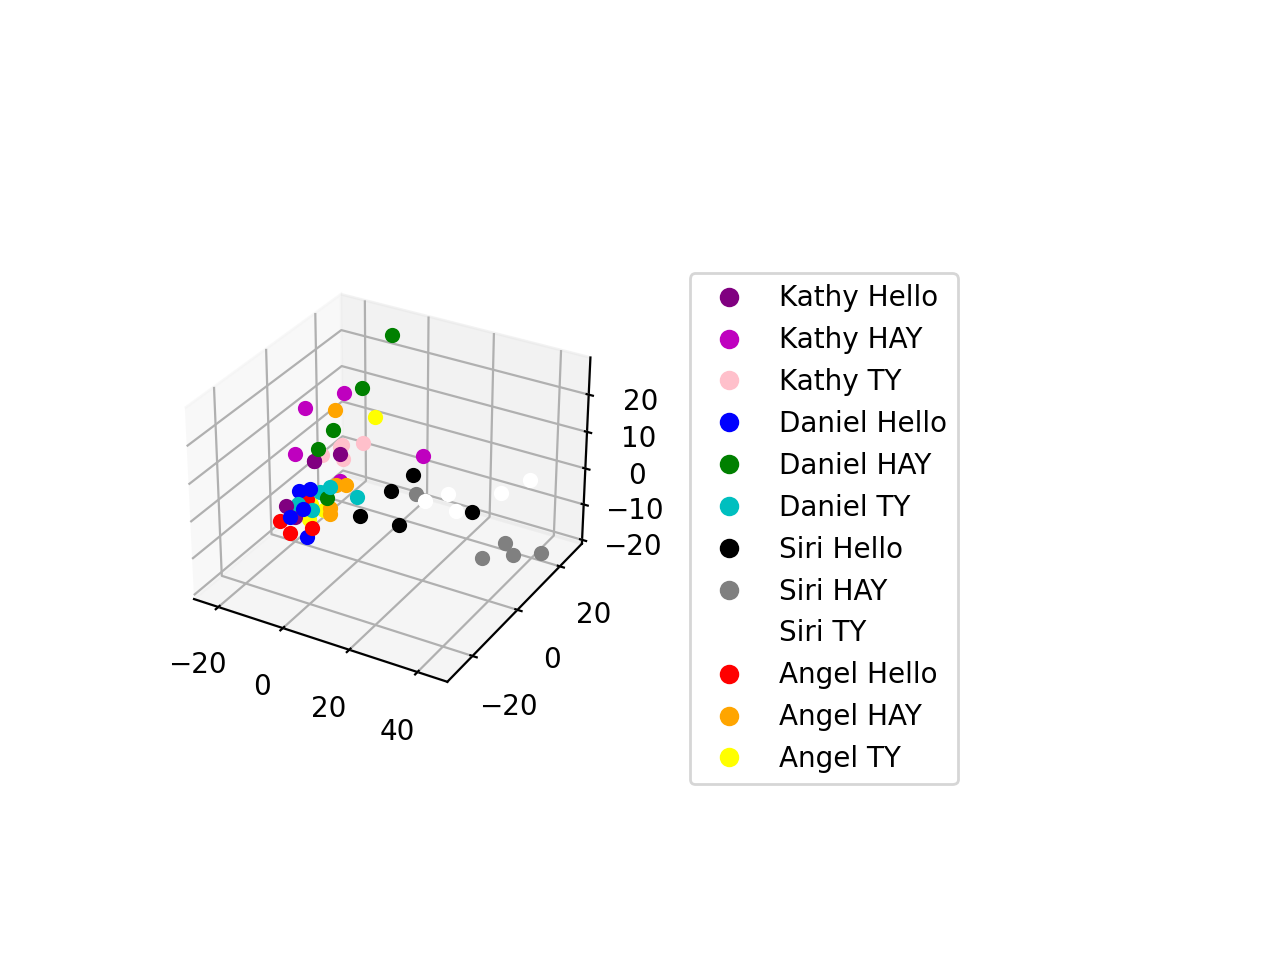

In [12]:
# pca for 3d
pca = PCA(n_components=3)
imgs_pca = pca.fit_transform(img_total)
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
for i in range(len(img_pca_unit)):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=colors[i])

# Add a legend to the plot
color_lb=["purple","m","pink","b","g","c","k","Grey","w","red","orange","yellow"]
labels = ['Kathy Hello','Kathy HAY','Kathy TY','Daniel Hello','Daniel HAY','Daniel TY','Siri Hello','Siri HAY','Siri TY','Angel Hello','Angel HAY','Angel TY']
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(1.8, 1.0))


plt.show()
    

In [11]:
#normalize each vector to form a unit circle

img_pca_unit=[]

for vec in imgs_pca:
    img_pca_unit.append(vec/np.linalg.norm(vec))

img_pca_unit=np.array(img_pca_unit)
    
plot_point_cloud(img_pca_unit)



<IPython.core.display.Javascript object>


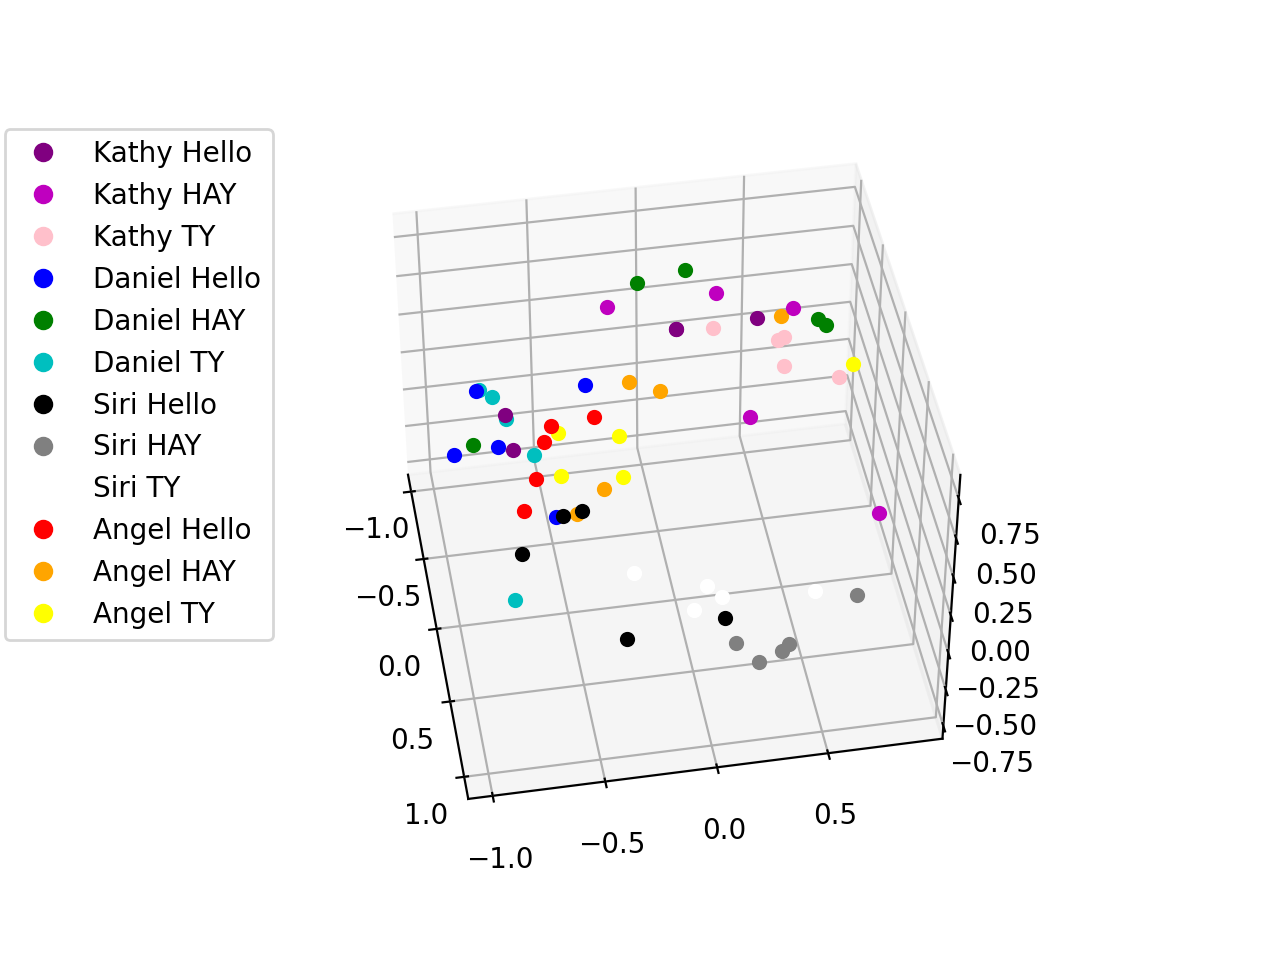

In [133]:

# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(img_pca_unit)):
    ax.scatter(img_pca_unit[i,0], img_pca_unit[i,1], img_pca_unit[i,2], c=colors[i],marker='o')

# Add a legend to the plot
color_lb=["purple","m","pink","b","g","c","k","Grey","w","red","orange","yellow"]
labels = ['Kathy Hello','Kathy HAY','Kathy TY','Daniel Hello','Daniel HAY','Daniel TY','Siri Hello','Siri HAY','Siri TY','Angel Hello','Angel HAY','Angel TY']
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0,1))

plt.show()

<IPython.core.display.Javascript object>


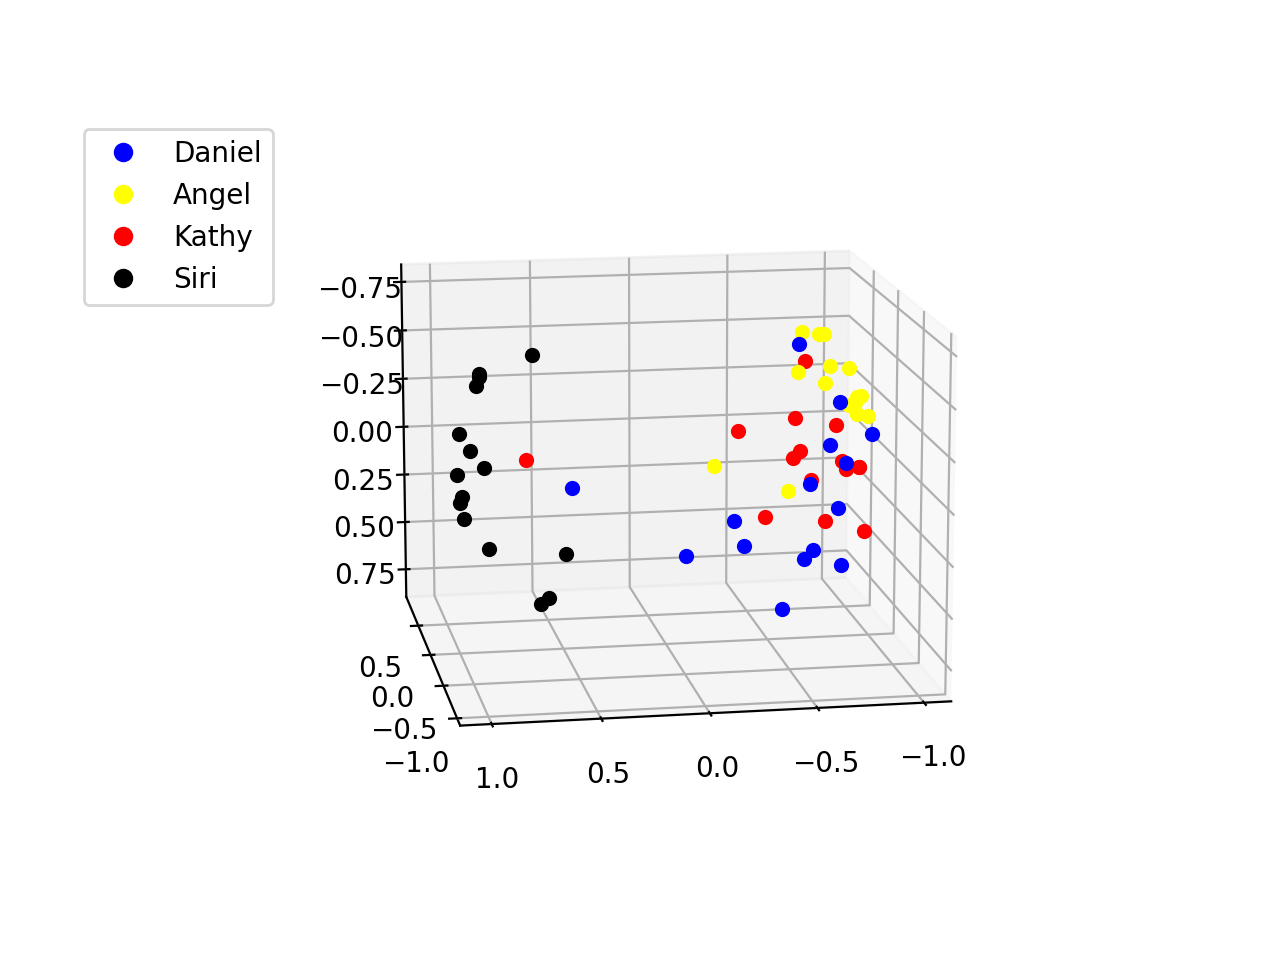

In [140]:
# one speaker same color
colors=[]
for i, label in enumerate(img_total_name):
    n=label.split()[0]
    w=label.split()[1]
    if n=="Daniel":
        colors.append("b")
    elif n=="Siri":
        colors.append("k")
    elif n=="Kathy":
        colors.append("r")
    else:
        colors.append("yellow")

# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(img_pca_unit)):
    ax.scatter(img_pca_unit[i,0], img_pca_unit[i,1], img_pca_unit[i,2], c=colors[i],marker='o')


# Add a legend to the plot
color_lb=["b","yellow","r","k"]
labels = ['Daniel',"Angel","Kathy","Siri"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0,1))

plt.show()

<IPython.core.display.Javascript object>


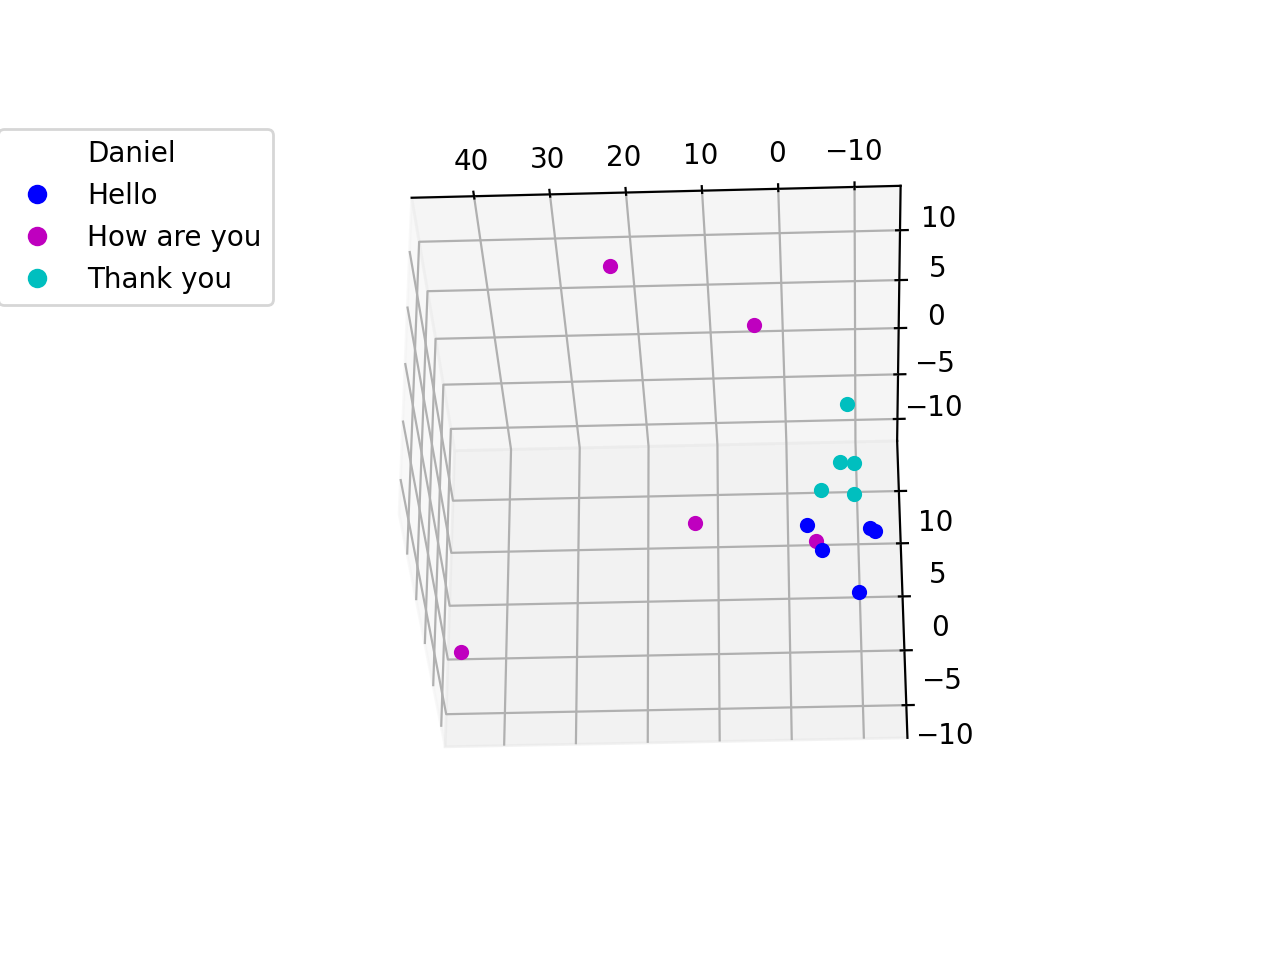

<IPython.core.display.Javascript object>


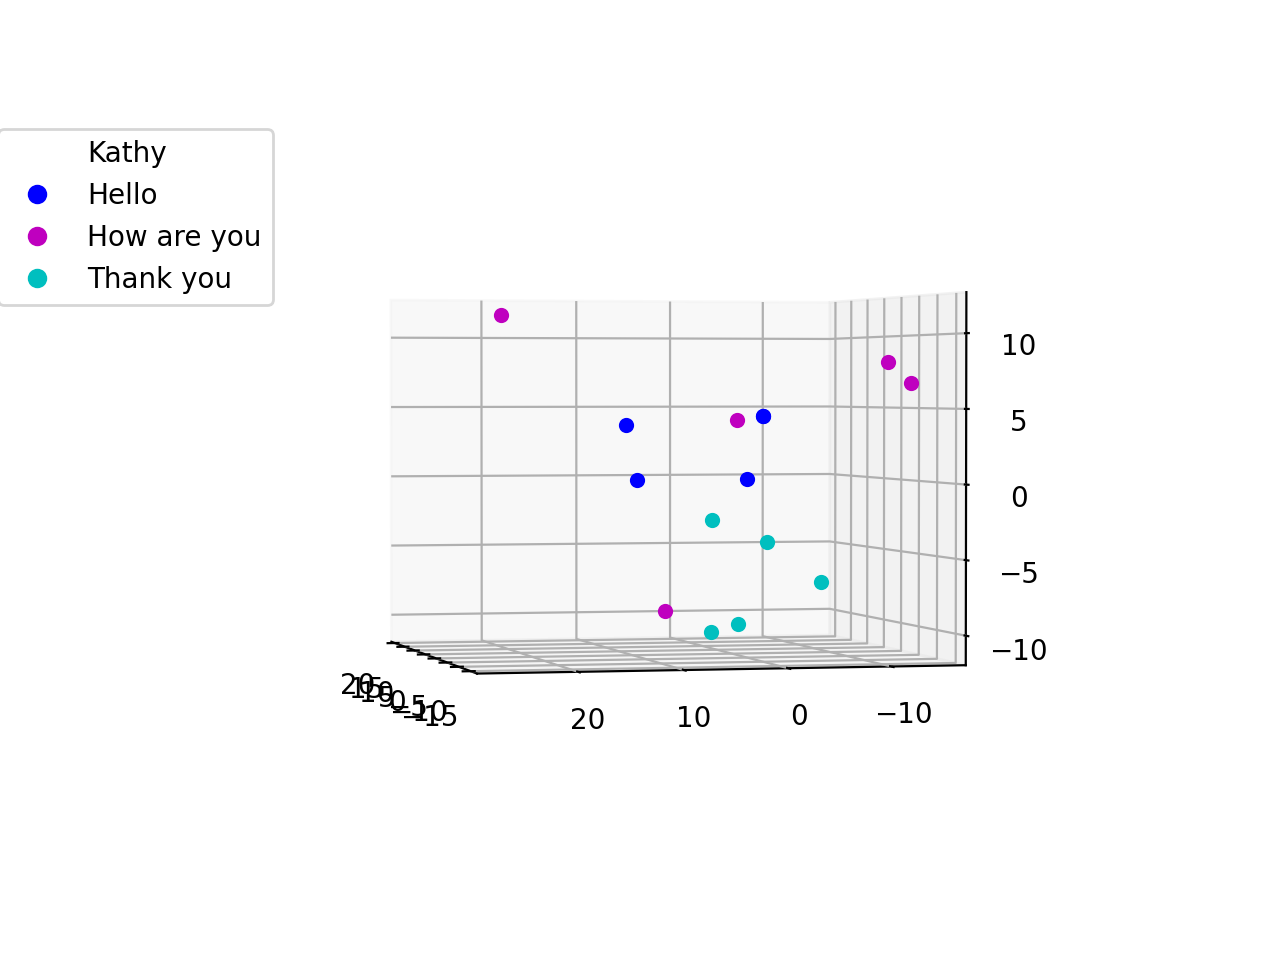

<IPython.core.display.Javascript object>


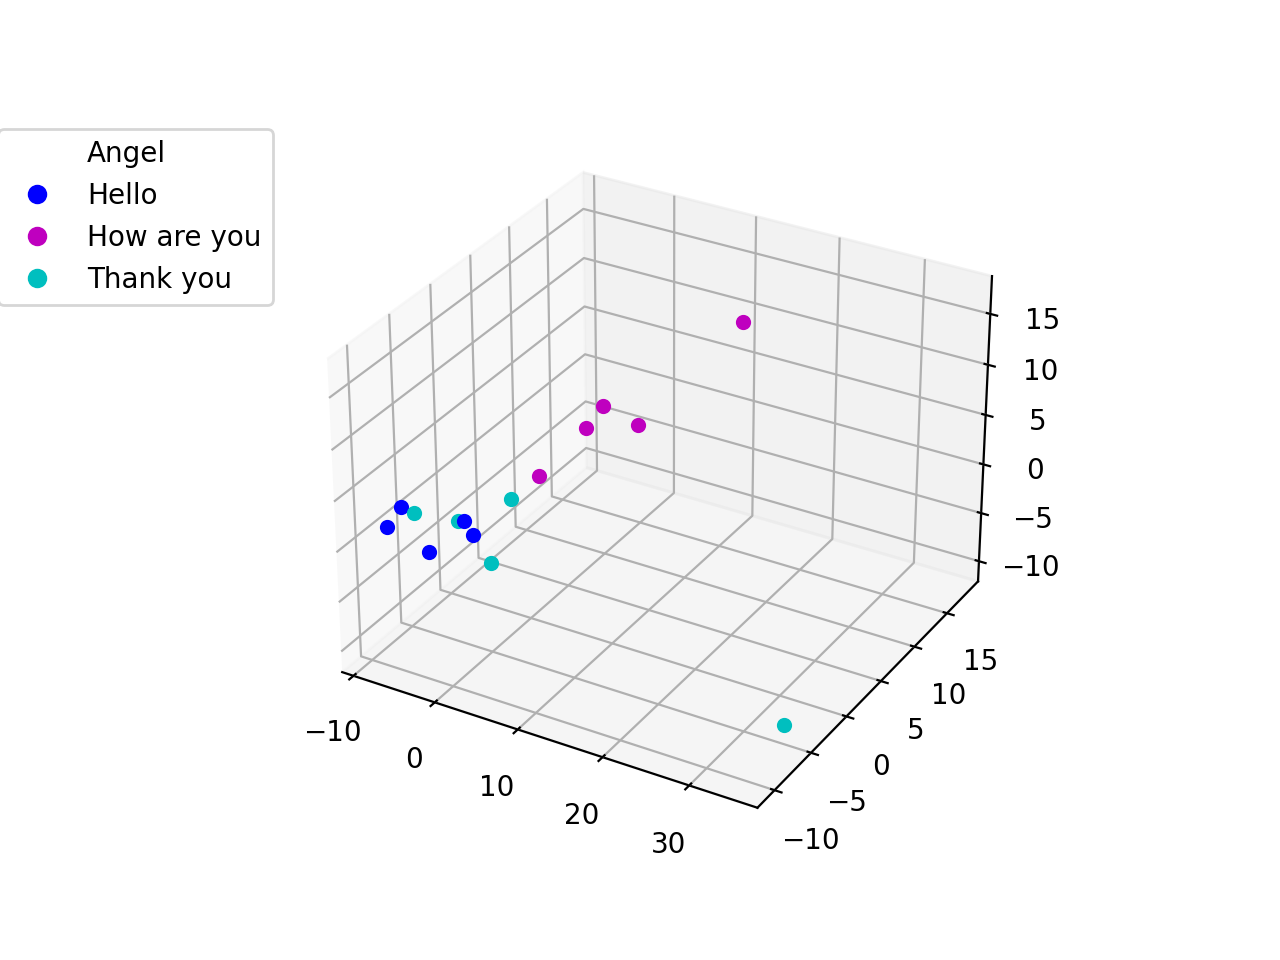

<IPython.core.display.Javascript object>


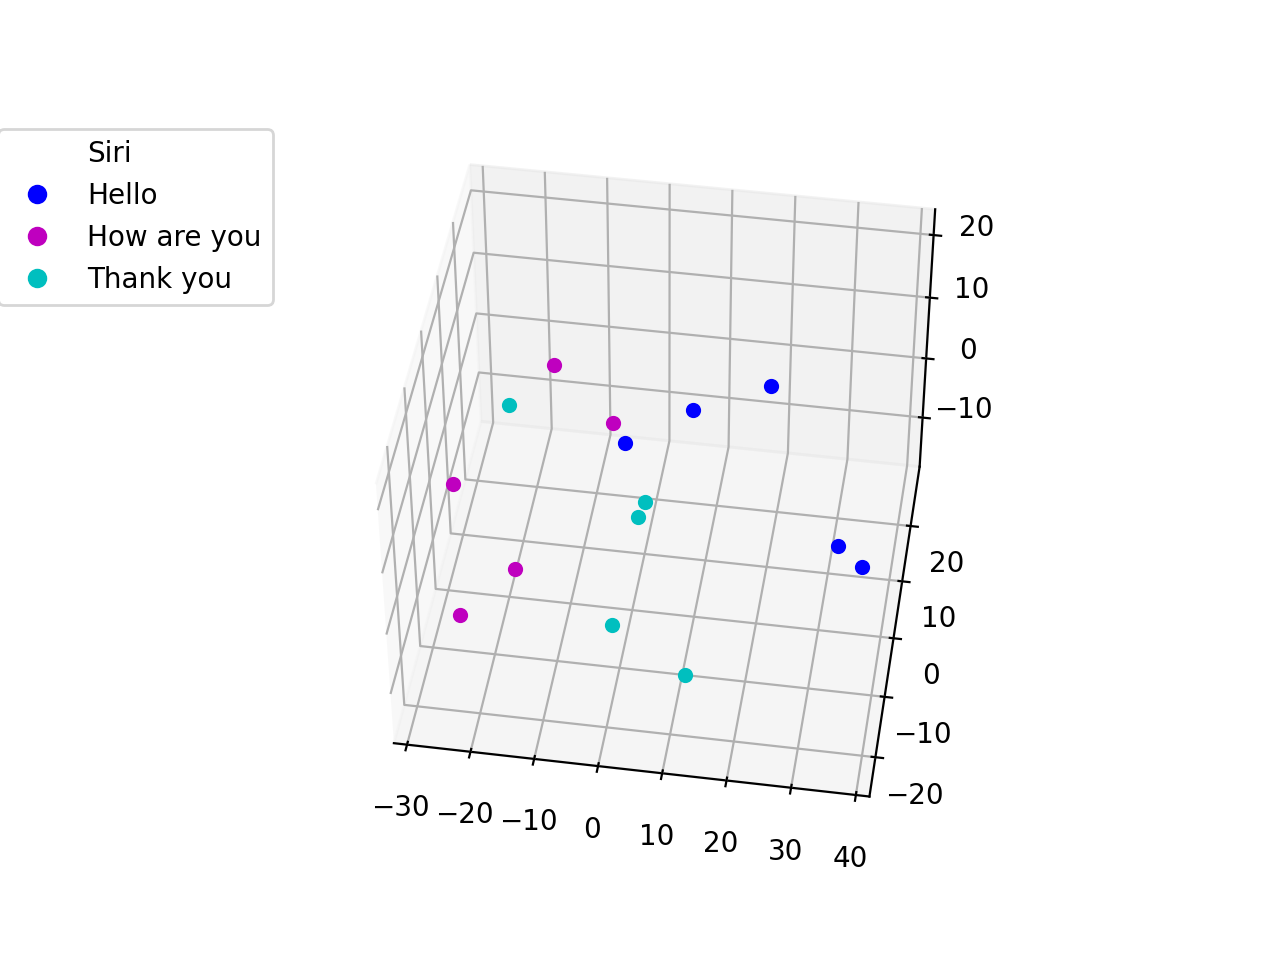

In [135]:
# just compare different voice of the same speaker

pca = PCA(n_components=3)
imgs_pca = pca.fit_transform(img_total[dl])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=d[i])

# Add a legend to the plot
color_lb=["w", "b","m","c"]
labels = ['Daniel','Hello',"How are you","Thank you"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

imgs_pca = pca.fit_transform(img_total[kl])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=k[i])

# Add a legend to the plot
color_lb=["w","b","m","c"]
labels = ['Kathy','Hello',"How are you","Thank you"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

imgs_pca = pca.fit_transform(img_total[al])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=a[i])

# Add a legend to the plot
color_lb=["w","b","m","c"]
labels = ["Angel",'Hello',"How are you","Thank you"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

imgs_pca = pca.fit_transform(img_total[sl])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=s[i])

# Add a legend to the plot
color_lb=["w","b","m","c"]
labels = ["Siri",'Hello',"How are you","Thank you"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

plt.show()
    

<IPython.core.display.Javascript object>


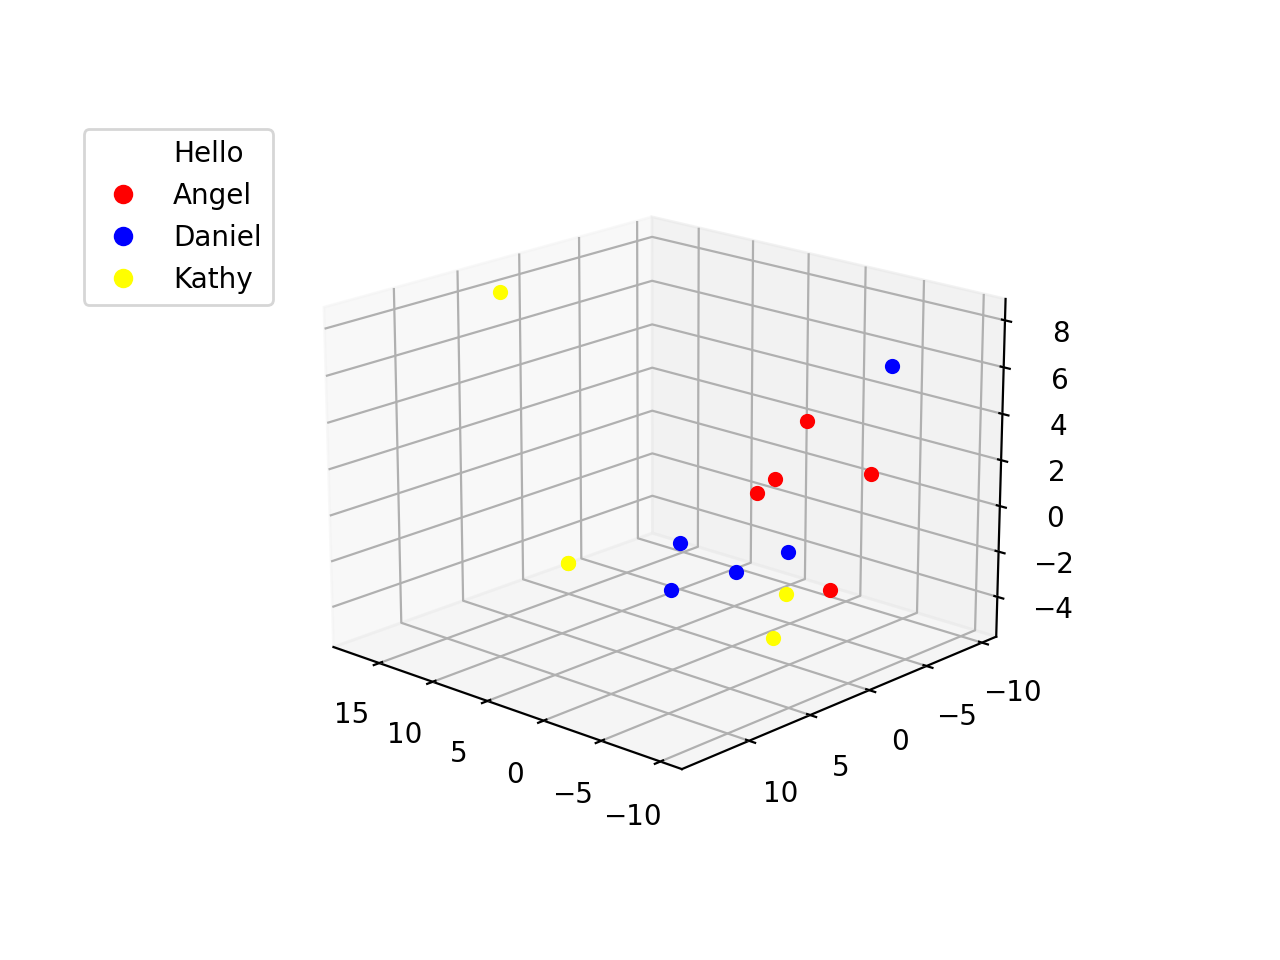

<IPython.core.display.Javascript object>


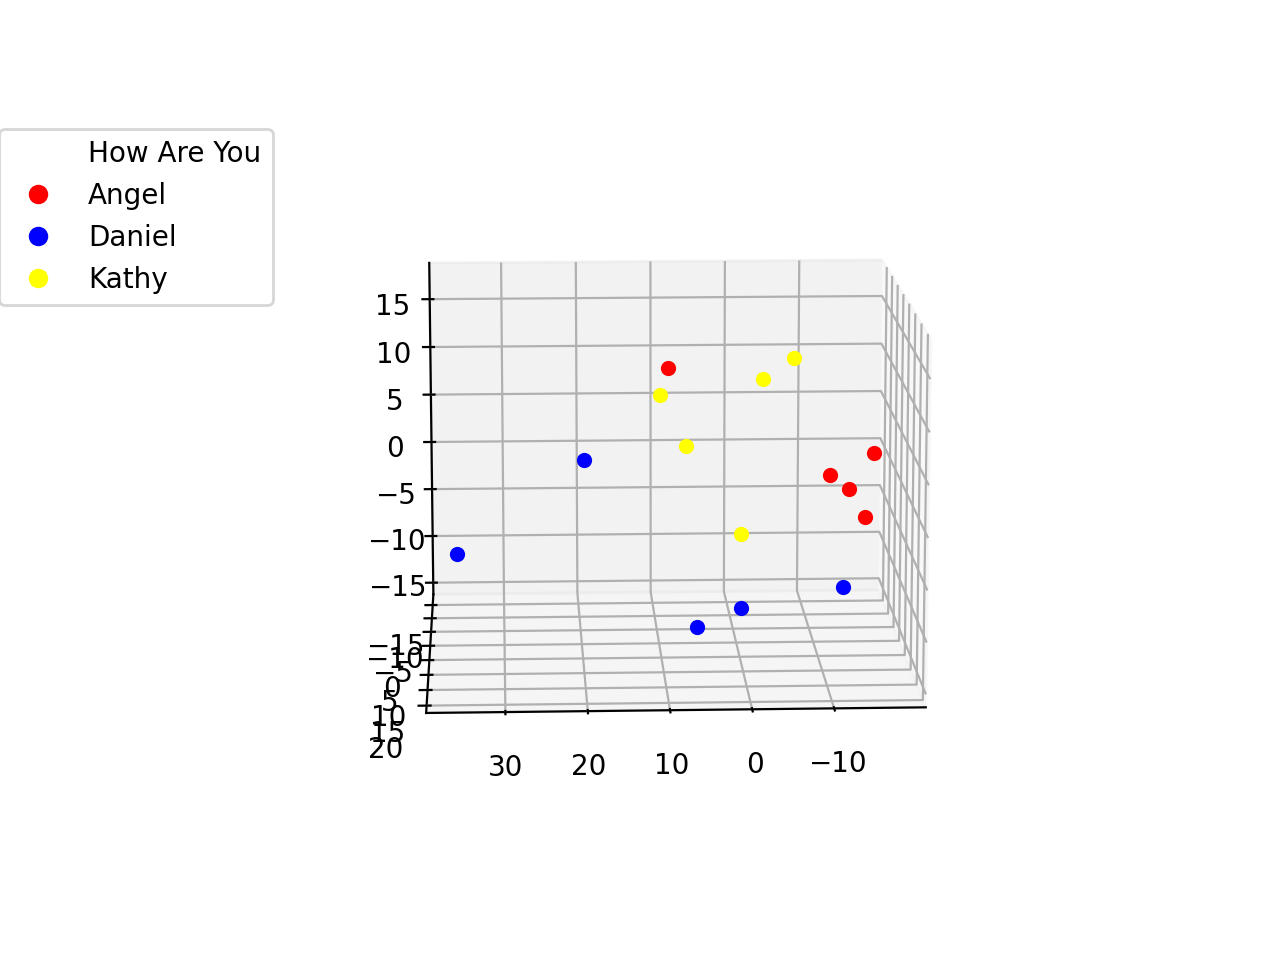

<IPython.core.display.Javascript object>


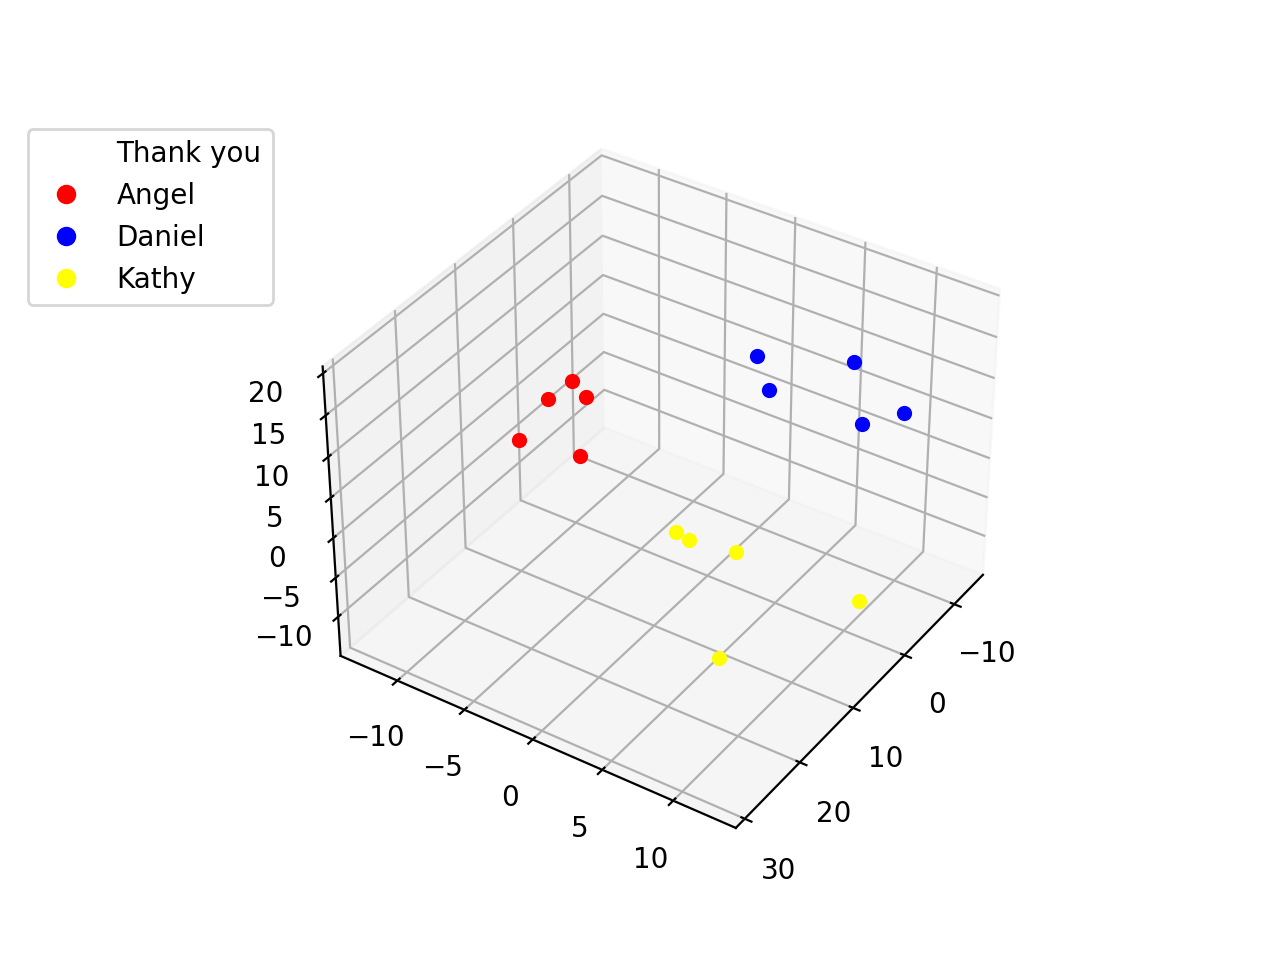

In [174]:
# compare same word for different speaker

pca = PCA(n_components=3)
imgs_pca = pca.fit_transform(img_total[hel])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=h1[i])

# Add a legend to the plot
color_lb=["w", "r","b","yellow"]
labels = ['Hello','Angel',"Daniel","Kathy"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

imgs_pca = pca.fit_transform(img_total[hay])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=h2[i])

# Add a legend to the plot
color_lb=["w", "r","b","yellow"]
labels = ['How Are You','Angel',"Daniel","Kathy"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

imgs_pca = pca.fit_transform(img_total[ty])
# Create a 3D scatter plot and assign a color to each row of the matrix
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(15):
    ax.scatter(imgs_pca[i,0], imgs_pca[i,1], imgs_pca[i,2], c=t[i])

# Add a legend to the plot
color_lb=["w", "r","b","yellow"]
labels = ['Thank you','Angel',"Daniel","Kathy"]
handles = [plt.plot([],[], marker="o", ls="", color=c)[0] for c in color_lb]
ax.legend(handles, labels,bbox_to_anchor=(0, 1.0))

In [96]:
print(img_total_name)

['Kathy HAY 2.wav', 'Kathy HAY 3.wav', 'Kathy HAY 1.wav', 'Daniel HAY 4.wav', 'Daniel HAY 5.wav', 'Kathy HAY 4.wav', 'Daniel HAY 1.wav', 'Kathy HAY 5.wav', 'Daniel HAY 2.wav', 'Daniel HAY 3.wav', 'Kathy Hello 3.wav', 'Angel Hello 5.wav', 'Siri TY 3.wav', 'Siri Hello 4.wav', 'Siri Hello 5.wav', 'Siri TY 2.wav', 'Angel Hello 4.wav', 'Kathy Hello 2.wav', 'Siri TY 1.wav', 'Kathy Hello 1.wav', 'Angel Hello 3.wav', 'Kathy Hello 5.wav', 'Siri TY 5.wav', 'Siri Hello 2.wav', 'Siri Hello 3.wav', 'Siri TY 4.wav', 'Kathy Hello 4.wav', 'Angel Hello 2.wav', 'Siri Hello 1.wav', 'Angel Hello 1.wav', 'Daniel TY 5.wav', 'Daniel TY 4.wav', 'Daniel TY 3.wav', 'Daniel TY 2.wav', 'Daniel TY 1.wav', 'Daniel Hello 3.wav', 'Angel TY 1.wav', 'Siri HAY 3.wav', 'Kathy TY 1.wav', 'Angel HAY 1.wav', 'Siri HAY 2.wav', 'Daniel Hello 2.wav', 'Angel TY 2.wav', 'Kathy TY 2.wav', 'Angel HAY 2.wav', 'Angel HAY 3.wav', 'Kathy TY 3.wav', 'Siri HAY 1.wav', 'Angel TY 3.wav', 'Daniel Hello 1.wav', 'Daniel Hello 5.wav', 'Siri H